# Day 2

* Grid Plots
* Exercises
* Projects
* Styles and aesthetics

## Review

* [Seaborn API][1] and [User Guide][2]
* Axes vs Grid plots
* `sns.plotting_func(x='col1', y='col2', data=df, hue='col3')`
* Open Seaborn Cheat Sheet


[1]: http://seaborn.pydata.org/api.html
[2]: https://seaborn.pydata.org/tutorial.html

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', rc={'figure.dpi': 147}, font_scale=0.7)

diamonds = pd.read_csv('../data/diamonds.csv')
diamonds.head(3)

### Exercise 1

Create a box plot that shows the distribution of carat for each clarity. Within each shape, show a box plot for three different colors. Filter for diamonds less than 2 carats first.

In [ ]:
fig, ax = plt.subplots(5, 3)


## Ordered Categorical Columns

* **Ordinal** - categorical columns that have a natural ordering
* Set on read with `dtype` and `pd.CategoricalDtype`

In [ ]:
dtype = {
    'clarity':  pd.CategoricalDtype(['SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF', 'FL'], ordered=True),
    'color':    pd.CategoricalDtype(['I', 'H', 'G', 'F', 'E', 'D'], ordered=True),
    'cut':      pd.CategoricalDtype(['Good', 'Very Good', 'Ideal', 'Astor Ideal'], ordered=True),
    'polish':   pd.CategoricalDtype(['Good', 'Very Good', 'Excellent'], ordered=True),
    'symmetry': pd.CategoricalDtype(['Good', 'Very Good', 'Excellent'], ordered=True),
}

diamonds_ord = pd.read_csv('../data/diamonds.csv', dtype=dtype)
diamonds_ord.head(3)

Sorting in pandas uses their categorical ordering.

In [ ]:
diamonds_ord['clarity'].value_counts().sort_index()

### Exercise 2

Create a bar plot of the average price for each clarity. Split clarity by color. Do not display a confidence interval.

In [ ]:
fig, ax = plt.subplots(10, 3)


### Move the legend with `sns.move_legend` function

* Pass the Axes or Grid as the first argument and set `loc` to one of upper/center/lower + right/left

## Seaborn Grid Plots

* A Grid is a matplotlib Figure containing one or more Axes
    * rows and columns of plots
* Only a few Seaborn plotting functions create Grids
    * `relplot` - creates grids of scatter or line plots
    * `displot` - creates grids of histograms or KDEs
    * `catplot` - creates grids of boxplots, bars, points
    * `lmplot` - creates grids of linear regression plots
    * `clustermap` - unique function that creates hierarchical cluster map with dendograms
* With the exception of `clustermap`, grid plots do not create new types of plots. They simply create the same Axes plots within a grid

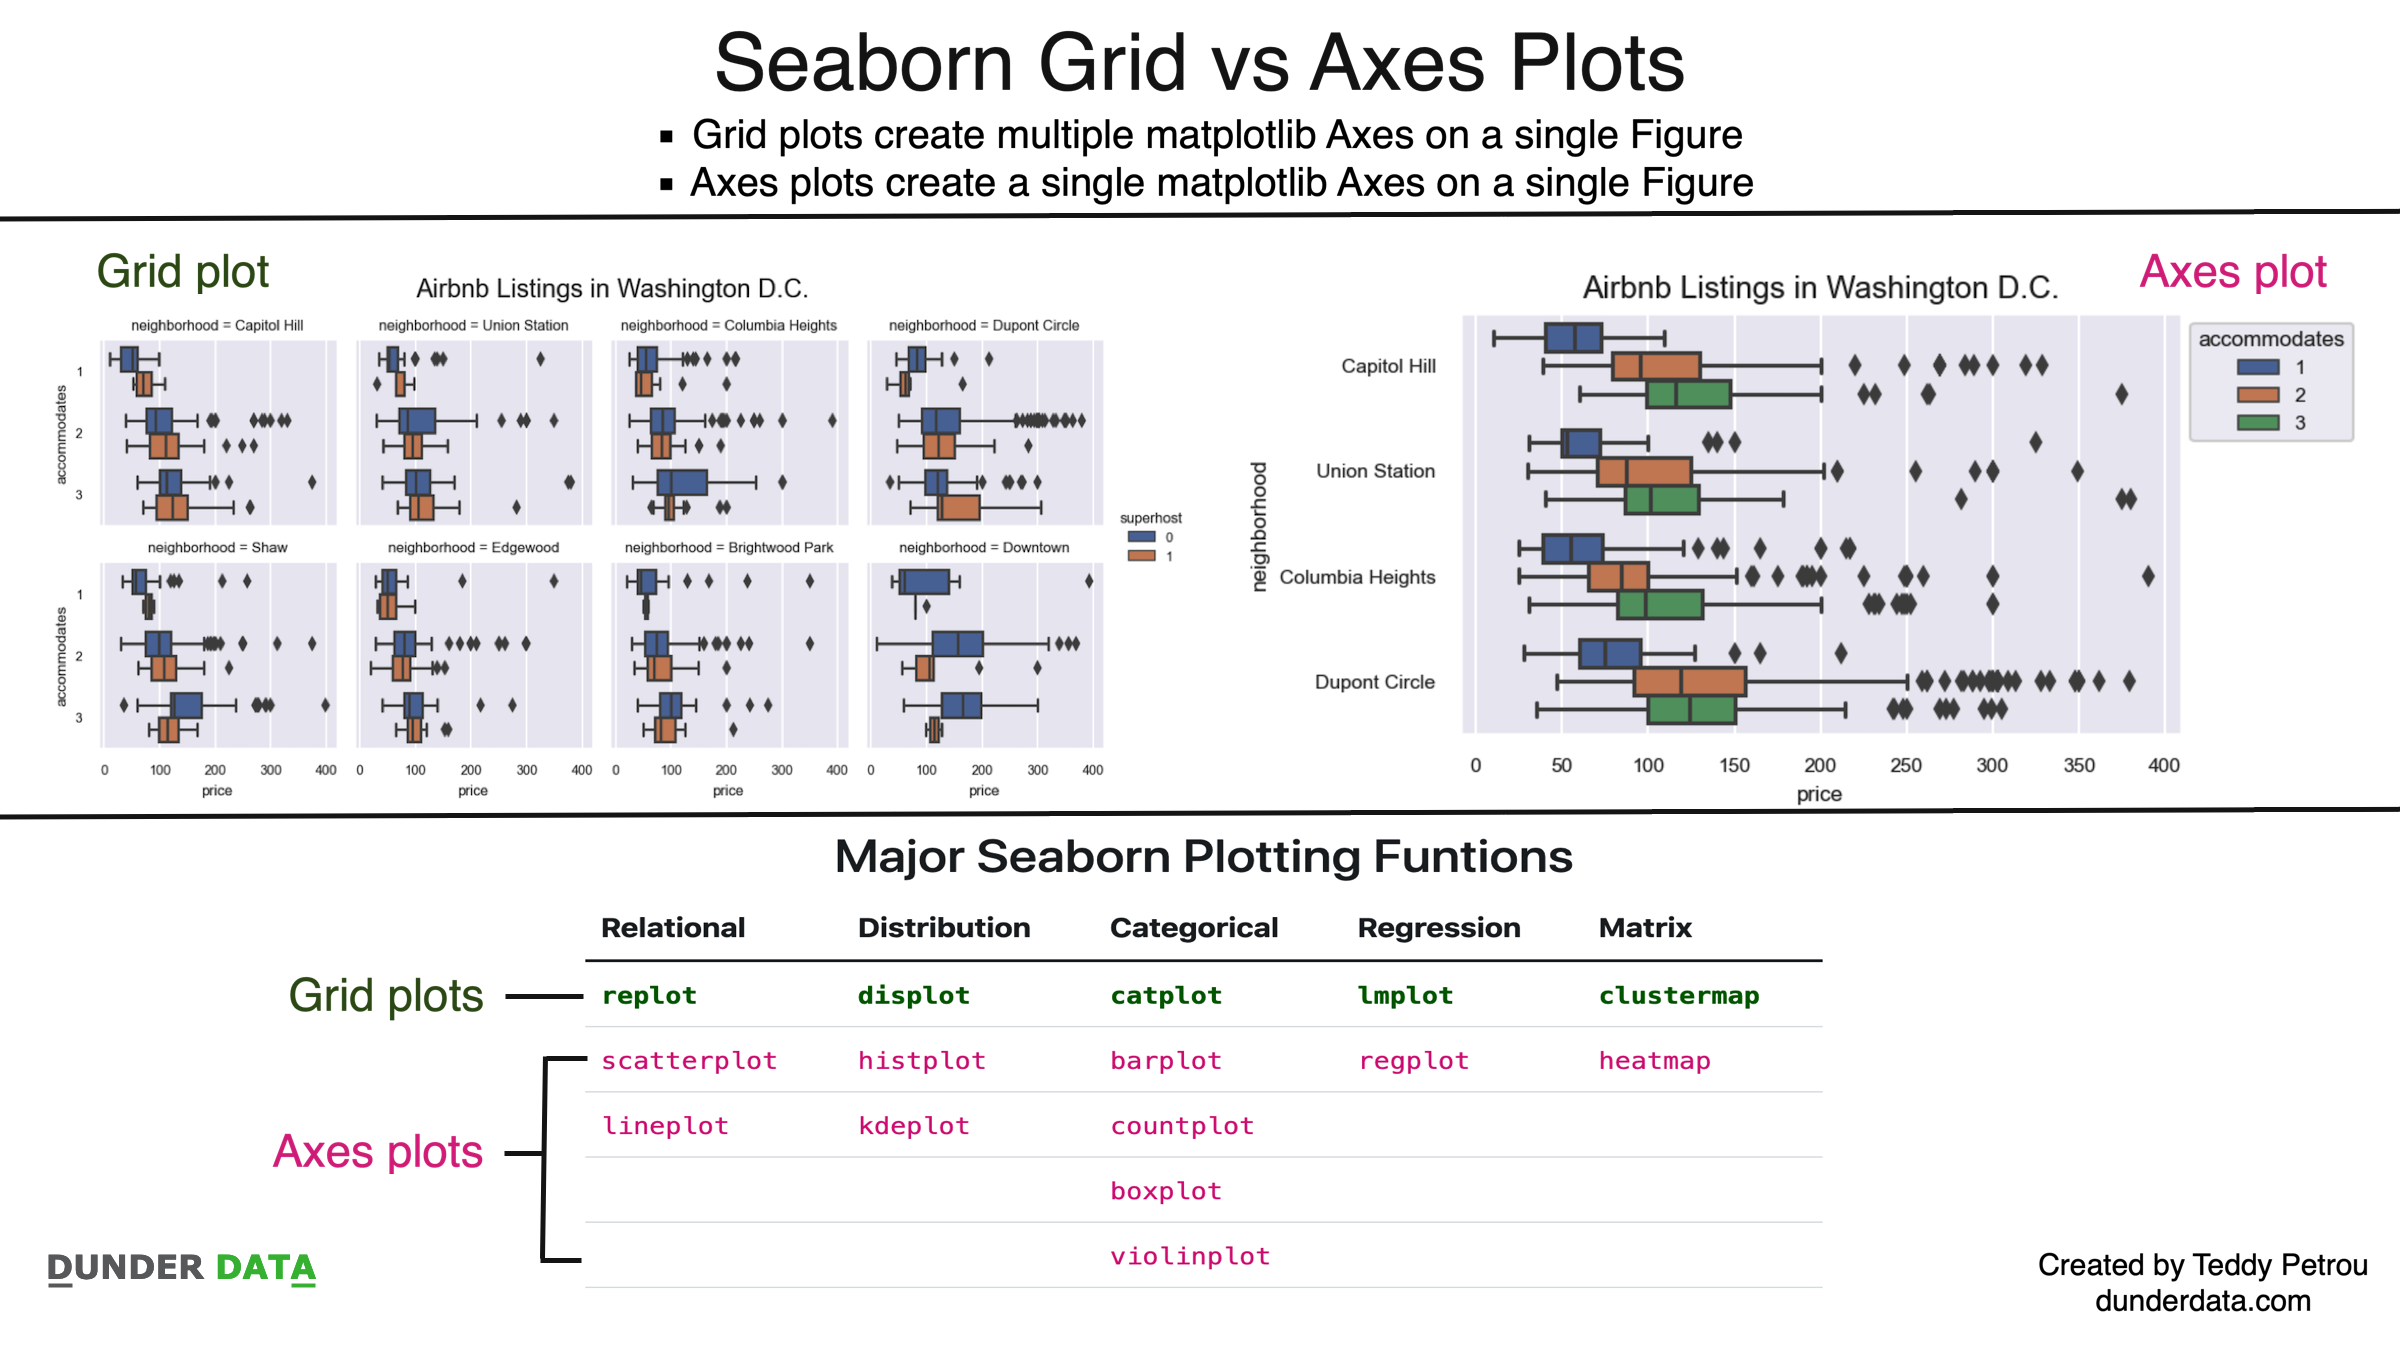

In [ ]:
airbnb = pd.read_csv('../data/airbnb.csv')
airbnb.head()

## How to use Grid plots 

* Use one of `relplot`, `displot`, `catplot`, or `lmplot`
* Set `kind` to the underlying Axes plot ("scatter", "line", "hist", "kde", "bar", "count", "box", "violin")
* Set `row` or `col` (or both) to a categorical column
* Set `col_wrap` to an integer to wrap the plots when only using `col` and not `row`
* Filter and set specific order with `row_order`, `col_order`
* No need to use a grid plot when creating a single Axes
* Use `height` and `aspect` to control height and width of each individual Axes
    * `height` is in figure inches of a single Axes
    * `aspect` is multiplied by `height` to get width of a single Axes
* Additional keyword arguments are forwarded to the underlying Axes plotting function

### Exercise 3

Create a 4x2 grid of plots broken out by the top 8 most frequent neighborhoods. In each Axes, create a boxplot of prices split by the number the listing accommodates and further split by superhost status.

## FacetGrid returned

* A wrapper around a matplotlib figure
* Underlying `figure` attribute


### Exercise 4

Get figure size with `get_size_inches` method

### Set figure title

* `grid.figure.suptitle`

### Change Axes titles with `grid.set_titles

### Exercise 5

Create a 2x2 grid of scatterplots of listing location (longitude, latitude) broken out by number accommodates. Limit the number it accommodates to 1 to 4. Color by neighborhoods, size by price, and style by superhost. Use `grid.set` to set equal aspect to all Axes. Filter for price less 400 and top 8 neighborhoods first.

### Exercise 6

Create a 4x2 grid of bar plots where the columns are the top 4 neighborhoods and the rows the top 2 room types. Graph the median price by accommodates (limiting to 1-4) and splitting by superhost. Use a 90% confidence interval. Change the axes titles to "room type in neighborhood". Change the title of the figure. Filter for price less than 400 first. 

### Exercise 7

Create a grid of bar plots showing the mean price for every unique clarity. Use color as the categorical variable.

## Regression plots 

* `regplot` - axes level
* `lmplot` - grid plot - uses `regplot` underneath
* Similar to `scatterplot` but with less options and draws regression line through points


### Exercise 8

Draw regression line through carat/price relationship.

## Mini-project 1

Create a data visualization that clearly shows that higher levels of clarity and color do correspond to higher prices, despite what exercise 7 showed.

## Mini-project 2

Create a scatterplot of the "mass" of the exoplanet vs the "semi-major axis", both in log units, and color the points based on the "planet discovery method".

In [ ]:
exo = pd.read_csv('../data/exoplanets.csv')
exo.head()

## Finding similar groups with `clustermap`

In [ ]:
meetup = pd.read_csv('../data/meetup.csv', index_col='member_id')
meetup.iloc[:3, :5]

### Using `clustermap`

* vmin, vmax, cmap

## Major project

The company you work for is looking to gain insights from its purchase order data during the year 2014. You have 10,000 different purchase orders from different states. The state, date, and revenue are recorded from each purchase order.

The company is primarily interested in determining what is happening to revenue over time and what strategy should be undertaken to maximize revenue.

In [ ]:
orders = pd.read_csv('../data/orders.csv', parse_dates=['order_date'])
orders.head()

### Add month as a column

In [ ]:
orders['month'] = orders['order_date'].dt.month_name()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
orders['month'] = orders['month'].astype(pd.CategoricalDtype(months, ordered=True))
orders.head()

## Color palettes

* Called [color maps in matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
* Qualitative - coloring of categories with no inherent ordering (neighborhood, diamond shape)
* Sequential - coloring for numeric and categorical values with inherent ordering (price, carat, clarity)
* Diverging - coloring for numeric and categorical values where there is a midpoint and moving away from this midpoint in any direction makes it more extreme

### How to create and set color palettes

* View color palettes with `sns.color_palette`
* Create your own palettes with functions like `sns.husl_palette` or `sns.choose_*`
* Set `palette` parameter in seaborn plotting functions to color palette object or string name

### View color palettes with `sns.color_palette`

* Qualitative color palettes
    * Seaborn - **deep**, muted, bright, pastel, dark, colorblind
    * Matplotlib - **tab10**, Pastel1 Pastel2 Paired Accent Dark2 Set1 Set2 Set3 tab20 tab20b tab20c 

### Sequential color palettes

* Seaborn - rocket, mako, flare, crest
* Matplotlib - viridis, plasma, inferno, magma, cividis

### Create your own color palettes

* `sns.husl_palette`
* `sns.choose_*`